<a href="https://colab.research.google.com/github/Dyh15/AI-Workshop-ML-applications-Drug-Design-anti-leshmania/blob/main/Autoencoder_convolutionnel_classique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import files
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
uploaded = files.upload()

Saving test_1.zip to test_1.zip
Saving train_1.zip to train_1.zip
Saving val_1.zip to val_1.zip


In [ ]:
file1='/content/train_1.zip'
file2='/content/val_1.zip'
with ZipFile(file1,'r') as zip_ref:
  zip_ref.extractall('train_1')
with ZipFile(file2,'r') as zip_ref:
  zip_ref.extractall('val_1')
print('done')

done


In [ ]:
path_train='/content/train_1/train_1'
img_tensors = []
for img_file in os.listdir(path_train):
    img_path = os.path.join(path_train, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
train = tf.stack(img_tensors)  # Convertir la liste des tenseurs en un seul tenseur
print(train.shape)

(87, 350, 350, 3)


In [ ]:
path_val = '/content/val_1/val_1'
img_tensors = []
for img_file in os.listdir(path_val):
    img_path = os.path.join(path_val, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
val = tf.stack(img_tensors)
print(val.shape)

(11, 350, 350, 3)


In [ ]:
input_shape=(350, 350, 3)
encoder= keras.Input(shape=input_shape) #encodeur
x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(encoder)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(encoded) #decodeur
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x=  keras.layers.experimental.preprocessing.Resizing(350, 350)(x)
decoded = keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder, decoded)

In [ ]:
autoencoder.summary() #la résolution d'image en sortie doit etre 350*350

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 350, 350, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 32)        18464 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = autoencoder.fit(train, train, epochs=10, batch_size=10, validation_data=(val, val), callbacks=[early_stopping])


Epoch 1/10
9/9 [==============================] - 105s 11s/step - loss: 0.0819 - val_loss: 0.0535
Epoch 2/10
9/9 [==============================] - 98s 11s/step - loss: 0.0591 - val_loss: 0.0386
Epoch 3/10
9/9 [==============================] - 99s 11s/step - loss: 0.0420 - val_loss: 0.0244
Epoch 4/10
9/9 [==============================] - 98s 11s/step - loss: 0.0305 - val_loss: 0.0202
Epoch 5/10
9/9 [==============================] - 98s 11s/step - loss: 0.0253 - val_loss: 0.0183
Epoch 6/10
9/9 [==============================] - 98s 11s/step - loss: 0.0223 - val_loss: 0.0159
Epoch 7/10
9/9 [==============================] - 105s 12s/step - loss: 0.0216 - val_loss: 0.0161
Epoch 8/10
9/9 [==============================] - 98s 11s/step - loss: 0.0210 - val_loss: 0.0159


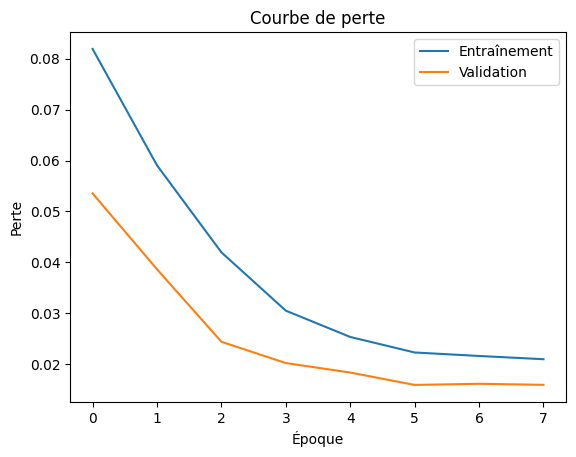

In [ ]:
history = autoencoder.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Validation'], loc='upper right')
plt.show()

In [ ]:
file3='/content/test_1.zip'
with ZipFile(file3,'r') as zip_ref:
  zip_ref.extractall('test')
print('done')

done


In [ ]:
path_test = '/content/test/test_1'
img_tensors = []
for img_file in os.listdir(path_test):
    img_path = os.path.join(path_test, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
test = tf.stack(img_tensors)
print(test.shape)

(11, 350, 350, 3)


In [ ]:
reconstructed = autoencoder.predict(test)
erreurs_reconstruction = np.mean(np.square(test - reconstructed), axis=(1, 2, 3))
print(erreurs_reconstruction)

1/1 [==============================] - 6s 6s/step
[0.0137585  0.01807791 0.006261   0.0244093  0.00790442 0.02681539
 0.02138614 0.01526183 0.03524481 0.00809202 0.00689713]


In [ ]:
seuil = 0.015
for i, erreur_reconstruction in enumerate(erreurs_reconstruction):
    print("L'erreur de reconstruction à l'indice", i, "est égale à:", erreur_reconstruction)

    if erreur_reconstruction <= seuil:
        print('Patiente Malade')
    else:
        print('Patiente Saine')

L'erreur de reconstruction à l'indice 0 est égale à: 0.013758499
Patiente Malade
L'erreur de reconstruction à l'indice 1 est égale à: 0.018077908
Patiente Saine
L'erreur de reconstruction à l'indice 2 est égale à: 0.0062610027
Patiente Malade
L'erreur de reconstruction à l'indice 3 est égale à: 0.024409296
Patiente Saine
L'erreur de reconstruction à l'indice 4 est égale à: 0.007904417
Patiente Malade
L'erreur de reconstruction à l'indice 5 est égale à: 0.026815392
Patiente Saine
L'erreur de reconstruction à l'indice 6 est égale à: 0.021386137
Patiente Saine
L'erreur de reconstruction à l'indice 7 est égale à: 0.0152618345
Patiente Saine
L'erreur de reconstruction à l'indice 8 est égale à: 0.03524481
Patiente Saine
L'erreur de reconstruction à l'indice 9 est égale à: 0.008092018
Patiente Malade
L'erreur de reconstruction à l'indice 10 est égale à: 0.0068971347
Patiente Malade


In [ ]:
print(min(erreurs_reconstruction)) #pour voir le point de départ du seuil
print(max(erreurs_reconstruction))

0.0062610027
0.03524481


In [ ]:
seuil= 0.015

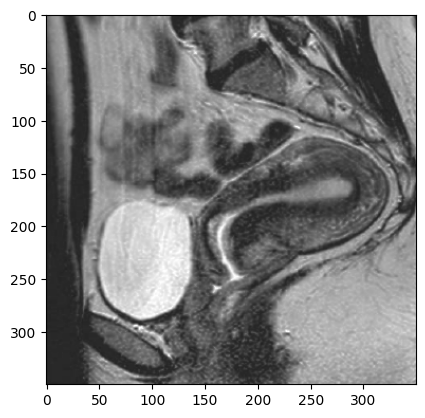

In [ ]:
size= (350, 350)  #Charger l'image et l'afficher
img_path = '/content/normalpelv.png'
img_test = cv2.imread(img_path)
img_norm = img_test.astype(np.float32) #normalisation
img_norm /= 255.0
resized_img = cv2.resize(img_norm, size)
plt.imshow(resized_img, cmap='gray')
plt.show()

In [ ]:
tensor = tf.convert_to_tensor(resized_img) #conversion de l'image en tenseur
tensor = tf.expand_dims(tensor, axis=0) #le tenseur doit etre en 4D
print(tensor.shape)

(1, 350, 350, 3)


1/1 [==============================] - 0s 317ms/step


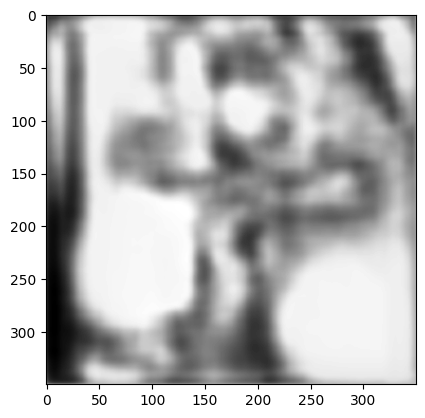

In [ ]:
reconstruction = autoencoder.predict(tensor)
generated_img = np.squeeze(reconstruction)  # Si nécessaire, supprimez les dimensions superflues
generated_img = generated_img * 255
generated_img = generated_img.astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(generated_img, cmap='gray')
plt.show()

In [ ]:
erreur_reconstruction = np.mean(np.square(tensor - reconstruction))
print(" l'erreur de reconstruction est égale à:", erreur_reconstruction)
if erreur_reconstruction > seuil:
    print('Patiente Saine')
else:
    print('Patiente Malade')

 l'erreur de reconstruction est égale à: 0.019238865
Patiente Saine


In [ ]:
file4='/content/test_0.zip'
with ZipFile(file4,'r') as zip_ref:
  zip_ref.extractall('stest')
print('done')

done


In [ ]:
path_stest = '/content/stest/test_0'
img_tensors = []
for img_file in os.listdir(path_stest):
    img_path = os.path.join(path_stest, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
stest = tf.stack(img_tensors)
print(stest.shape)

(11, 350, 350, 3)


In [ ]:
reconstructed = autoencoder.predict(stest)
erreurs_reconstruction = np.mean(np.square(stest - reconstructed), axis=(1, 2, 3))
print(erreurs_reconstruction)

1/1 [==============================] - 3s 3s/step
[0.01223239 0.03381839 0.01916016 0.06330964 0.01053696 0.01921327
 0.01286645 0.01282958 0.01211357 0.00772432 0.01237188]


In [ ]:
for i, erreur_reconstruction in enumerate(erreurs_reconstruction):
    print("L'erreur de reconstruction à l'indice", i, "est égale à:", erreur_reconstruction)

    if erreur_reconstruction <= seuil:
        print('Patiente Malade')
    else:
        print('Patiente Saine')

L'erreur de reconstruction à l'indice 0 est égale à: 0.013758499
Patiente Malade
L'erreur de reconstruction à l'indice 1 est égale à: 0.018077908
Patiente Saine
L'erreur de reconstruction à l'indice 2 est égale à: 0.0062610027
Patiente Malade
L'erreur de reconstruction à l'indice 3 est égale à: 0.024409296
Patiente Saine
L'erreur de reconstruction à l'indice 4 est égale à: 0.007904417
Patiente Malade
L'erreur de reconstruction à l'indice 5 est égale à: 0.026815392
Patiente Saine
L'erreur de reconstruction à l'indice 6 est égale à: 0.021386137
Patiente Saine
L'erreur de reconstruction à l'indice 7 est égale à: 0.0152618345
Patiente Saine
L'erreur de reconstruction à l'indice 8 est égale à: 0.03524481
Patiente Saine
L'erreur de reconstruction à l'indice 9 est égale à: 0.008092018
Patiente Malade
L'erreur de reconstruction à l'indice 10 est égale à: 0.0068971347
Patiente Malade
